In [2]:
import pandas as pd
import glob
import os
from tqdm import tqdm
from datetime import datetime
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.stats import zscore
import ruptures as rpt

In [2]:
main_df = pd.read_csv("./freq_2412.csv")
main_df["Date"] = pd.to_datetime(main_df["Date"])

In [ ]:
idx_loc = {0: "Madsen", 1: "EBC", 2: "Sagepoint", 3: "Moran", 4: "Bookstore", 5: "WEB", 6: "Garage", 7: "Guesthouse"}

In [4]:
# # 0: Day (Morning and Afternoon); 1: Night (Evening and Night)
# main_df_1 = main_df
# main_df_1.loc[main_df_1['Time_of_Day'] == 0, "Time_of_Day"] = 0
# main_df_1.loc[main_df_1['Time_of_Day'] == 1, "Time_of_Day"] = 0
# main_df_1.loc[main_df_1['Time_of_Day'] == 2, "Time_of_Day"] = 1
# main_df_1.loc[main_df_1['Time_of_Day'] == 3, "Time_of_Day"] = 1
# main_df = main_df_1

compressed_data_6.csv
Date
2023-10-01     426156
2024-01-01    1787274
2024-04-01    1787543
2024-07-01    1787578
2024-10-01    1722459
2025-01-01    1231299
2025-04-01     106530
Freq: QS-JAN, dtype: int64


C:\Users\piyus\AppData\Local\Temp\ipykernel_11940\64113092.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


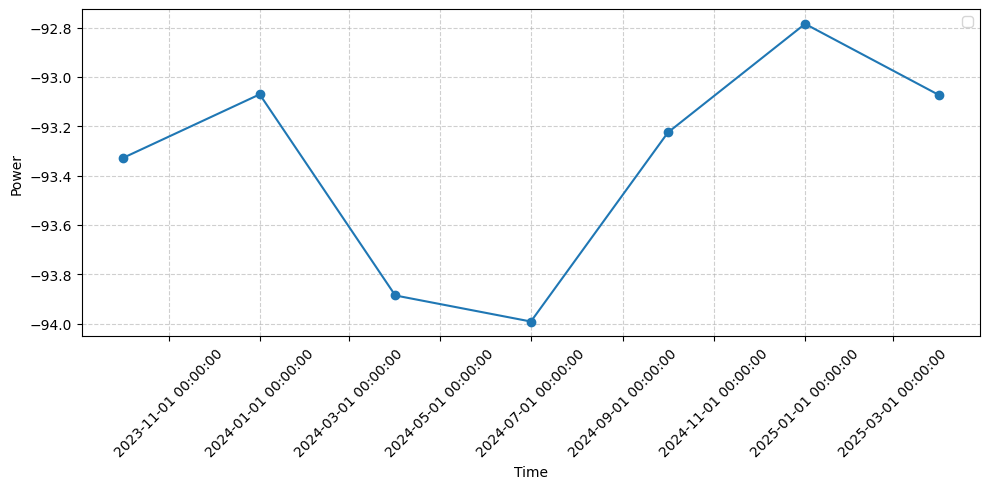

compressed_data_7.csv
Date
2023-10-01     506548
2024-01-01    1628016
2024-04-01    1717462
2024-07-01    1649065
2024-10-01    1607460
2025-01-01    1020397
2025-04-01      84493
Freq: QS-JAN, dtype: int64


C:\Users\piyus\AppData\Local\Temp\ipykernel_11940\64113092.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


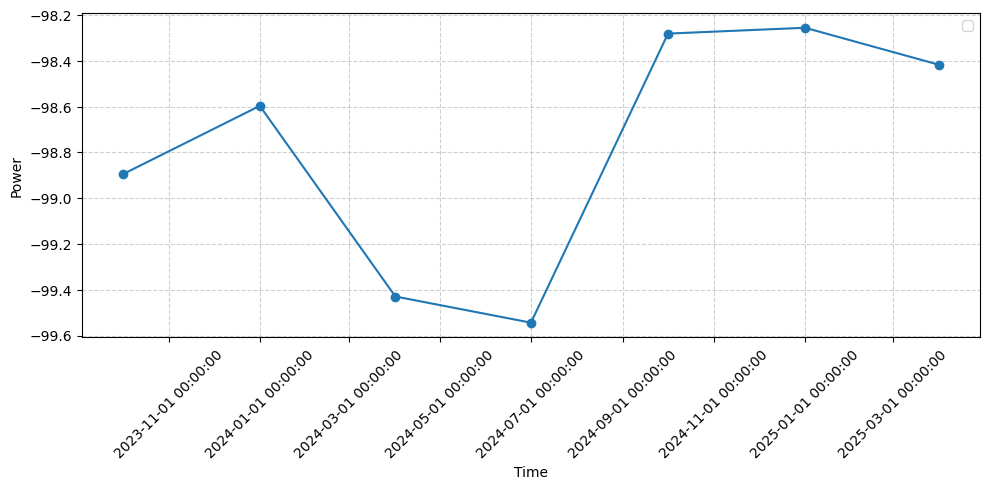

compressed_data_8.csv


C:\Users\piyus\AppData\Local\Temp\ipykernel_11940\64113092.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


Date
2020-07-01     293493
2020-10-01     510127
2021-01-01     794933
2021-04-01    1278107
2021-07-01     226990
2021-10-01     209519
2022-01-01     626531
2022-04-01    1640775
2022-07-01    1523384
2022-10-01    1761047
2023-01-01     806255
2023-04-01    1221878
2023-07-01    1778058
2023-10-01     919207
2024-01-01    1439812
2024-04-01     862484
2024-07-01    1356518
2024-10-01    1129516
2025-01-01     373174
2025-04-01     183965
Freq: QS-JAN, dtype: int64


C:\Users\piyus\AppData\Local\Temp\ipykernel_11940\64113092.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


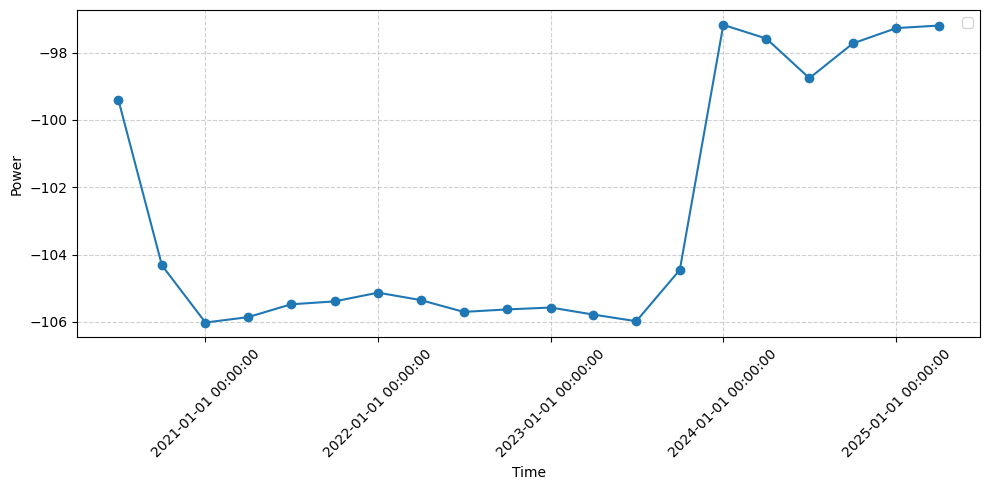

compressed_data_9.csv


C:\Users\piyus\AppData\Local\Temp\ipykernel_11940\64113092.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


Date
2020-10-01     486437
2021-01-01    1383798
2021-04-01    1712560
2021-07-01    1582177
2021-10-01    1420889
2022-01-01    1649268
2022-04-01    1704842
2022-07-01    1456094
2022-10-01    1548494
2023-01-01     718771
2023-04-01    1089341
2023-07-01    1616102
2023-10-01     942975
2024-01-01    1507041
2024-04-01    1595275
2024-07-01    1531740
2024-10-01    1485300
2025-01-01     942795
2025-04-01     182404
Freq: QS-JAN, dtype: int64


C:\Users\piyus\AppData\Local\Temp\ipykernel_11940\64113092.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


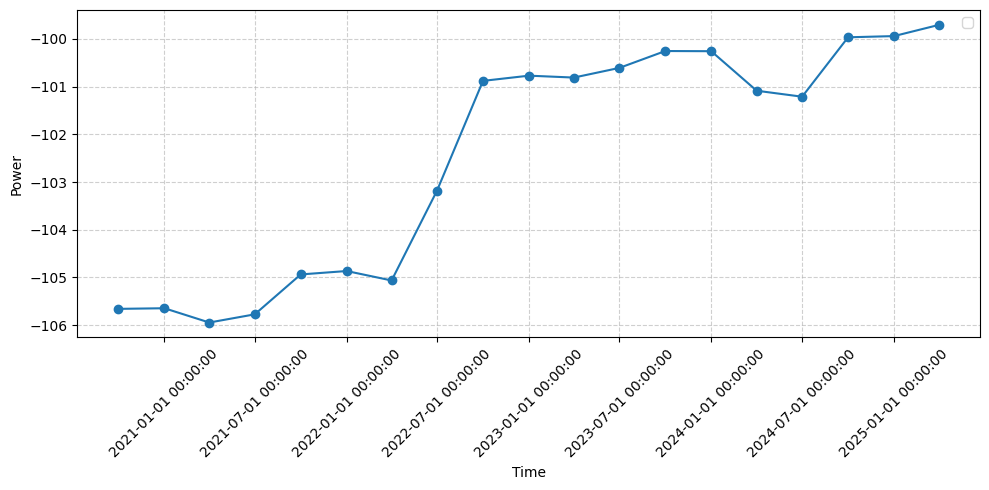

In [4]:
# df_2412 = pd.read_csv("./freq_2412.csv")
# df_2412["Date"] = pd.to_datetime(df_2412["Date"])
# df_2437 = pd.read_csv("./freq_2437.csv")
# df_2437["Date"] = pd.to_datetime(df_2437["Date"])
# df_2462 = pd.read_csv("./freq_2462.csv")
# df_2462["Date"] = pd.to_datetime(df_2462["Date"])
# df_2484 = pd.read_csv("./freq_2484.csv")
# df_2484["Date"] = pd.to_datetime(df_2484["Date"])

# for df in [df_2412, df_2437, df_2462, df_2484]:
for df in os.listdir('./compressed_data/')[-4:]:
    print(df)
    df = pd.read_csv('./compressed_data/'+df)
    # df = df[df["Location"] == 0]
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values(by="Date")
    df = df[(np.abs(zscore(df['power'])) < 2)]
    filtered_df = df.resample("QS", on="Date").mean(numeric_only=True)
    quarterly_counts = df.resample("QS", on="Date").size()
    print(quarterly_counts)

    # print(filtered_df)

    fig, ax = plt.subplots(figsize=(10, 5))
    
    ax.plot(filtered_df.index, filtered_df["power"], marker='o')
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))

    # signal = filtered_df['power'].to_numpy().reshape(-1, 1)
    # model = rpt.Pelt(model="rbf").fit(signal)
    # change_points = model.predict(pen=5)
    # change_point_dates = filtered_df["Date"].iloc[change_points[:-1]]
    # for i, cp_date in enumerate(change_point_dates):
    #     ax.axvline(cp_date, color='red', linestyle='--', label="Change Point" if i == 0 else "")

    plt.xticks(rotation=45)
    # plt.title(f"Frequency : {filtered_df.loc[df.index[0], "frequency"]}")   
    plt.xlabel("Time")
    plt.ylabel("Power")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

2570
Min: -105.154 Max: -83.406


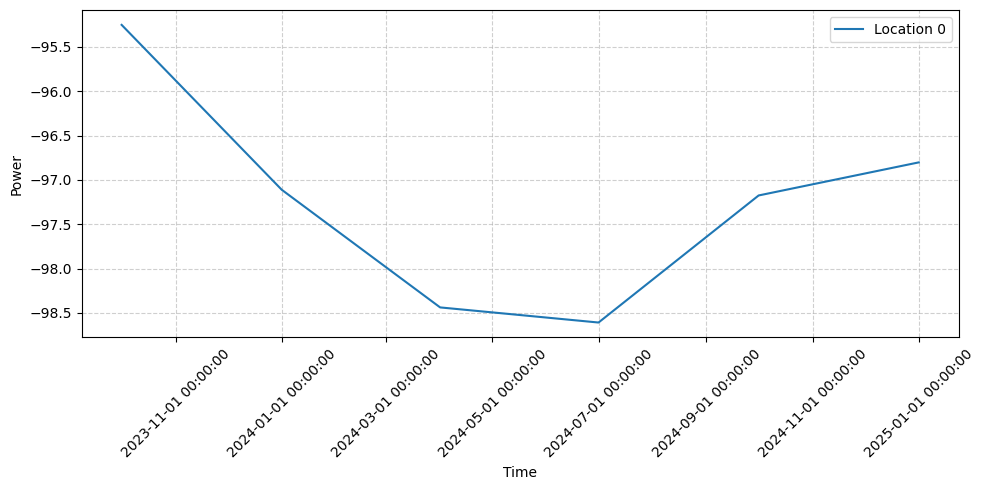

1110
Min: -97.825 Max: -82.746


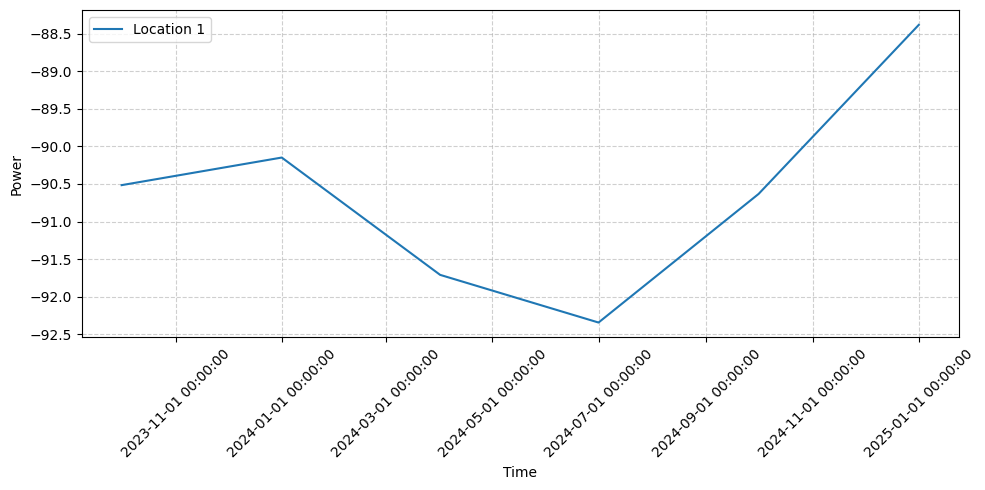

1354
Min: -104.011 Max: -85.252


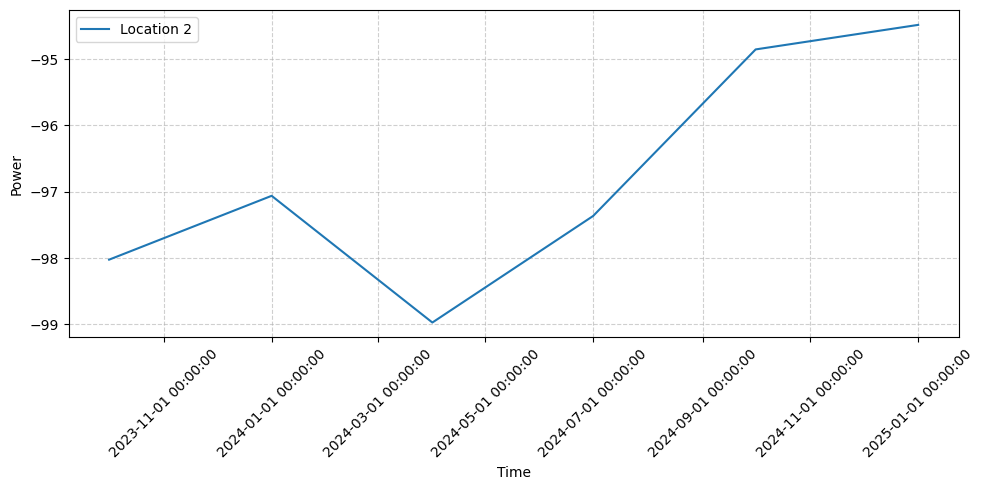

1226
Min: -104.271 Max: -87.702


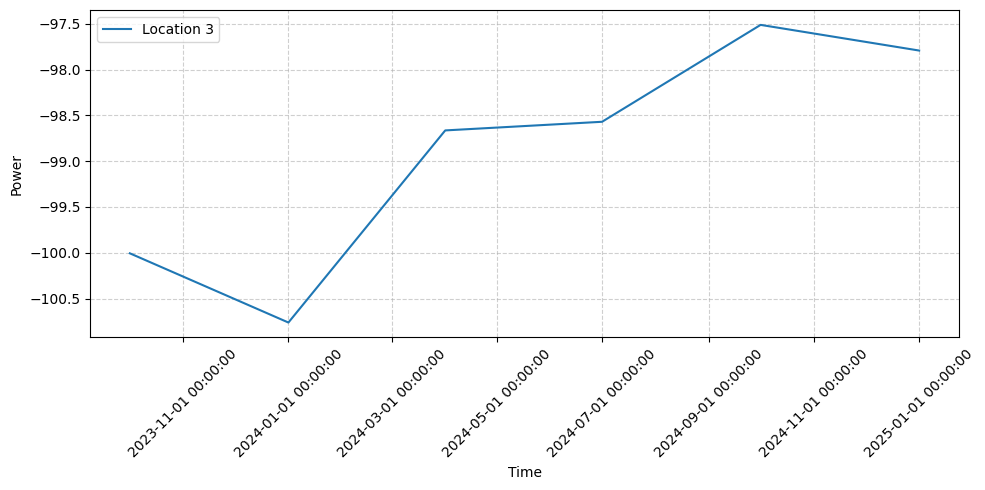

In [12]:
# LOCATION: Plot over time power graph

for location in range(4):
    df = main_df[main_df["Location"] == location]
    # print("Min:", df["power"].min(), "Max:", df["power"].max())
    print(len(df))
    df = df.sort_values(by="Date")
    df = df[(np.abs(zscore(df['power'])) < 3)]
    print("Min:", df["power"].min(), "Max:", df["power"].max())
    filtered_df = df.resample("QS", on="Date").mean(numeric_only=True)

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(filtered_df.index, filtered_df["power"], label=f"Location {location}")
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))

    
    # signal = df['power'].to_numpy().reshape(-1, 1)
    # model = rpt.Pelt(model="rbf").fit(signal)
    # change_points = model.predict(pen=8)
    # change_point_dates = df["Date"].iloc[change_points[:-1]]
    # for i, cp_date in enumerate(change_point_dates):
    #     ax.axvline(cp_date, color='red', linestyle='--', label="Change Point" if i == 0 else "")

    # Plot formatting
    plt.xticks(rotation=45)
    # plt.title(f"Location: {idx_loc[location]}")
    plt.xlabel("Time")
    plt.ylabel("Power")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

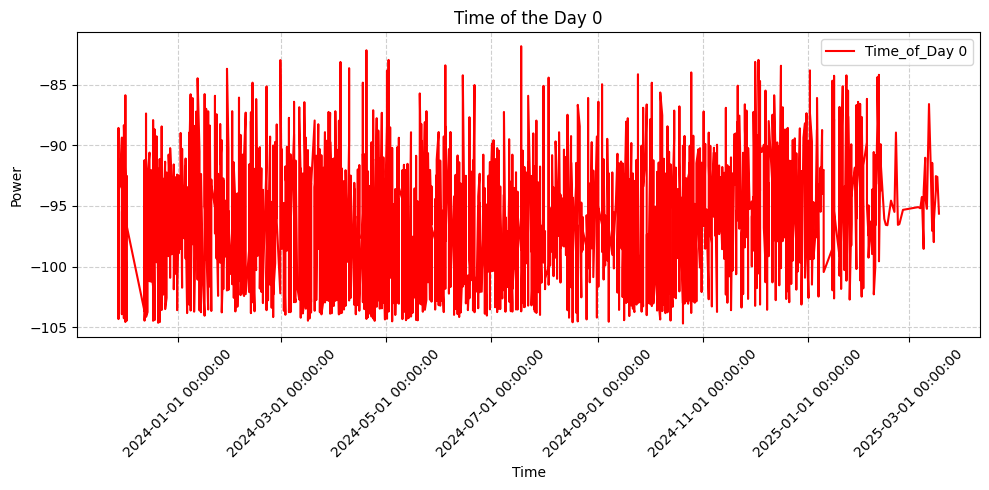

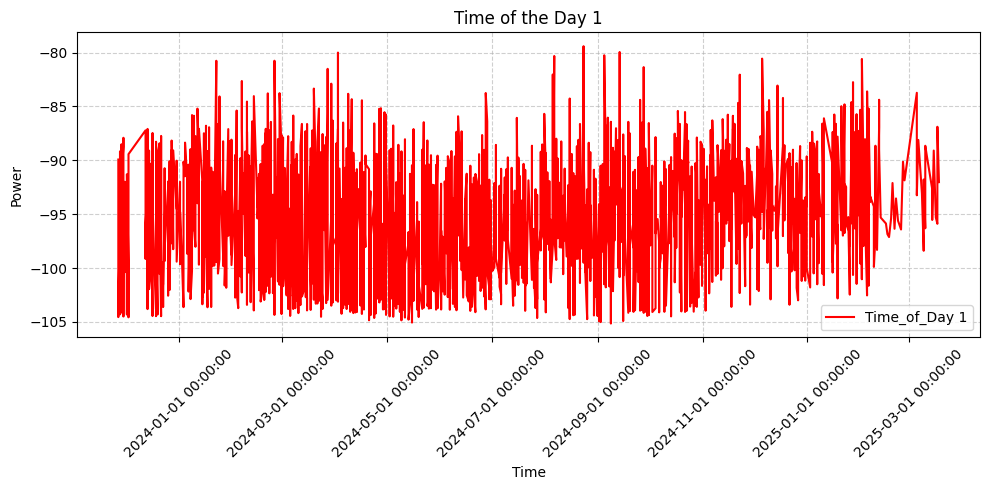

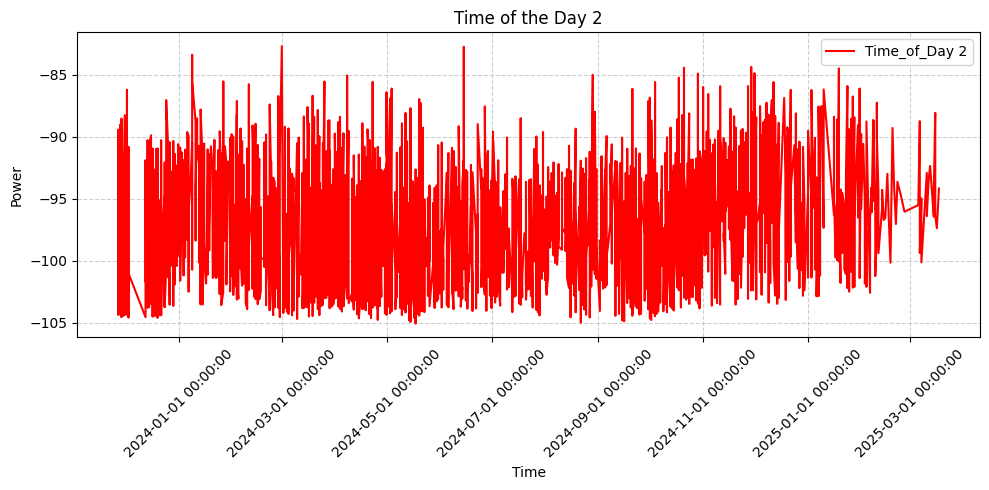

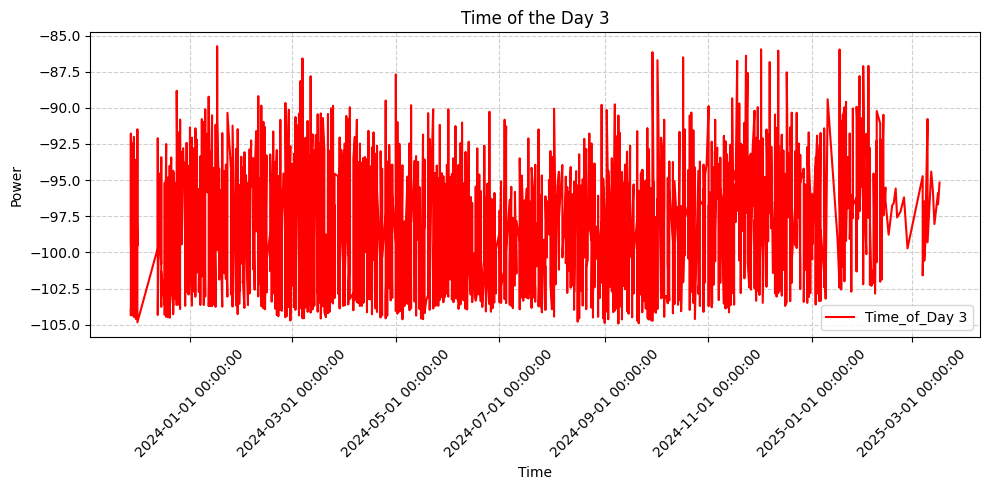

In [6]:
# TIME OF THE DAY: Plot over time power graph

for time in range(4):
    df = main_df[main_df["Time_of_Day"] == time]
    df = df.sort_values(by="Date")
    df = df[(np.abs(zscore(df['power'])) < 3)]
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(df["Date"], df["power"], label=f"Time_of_Day {time}", color="r")
    ax.xaxis.set_major_locator(mdates.AutoDateLocator()) 
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S')) 
    plt.xticks(rotation=45) 
    plt.title(f"Time of the Day {time}")
    plt.xlabel("Time")
    plt.ylabel("Power")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

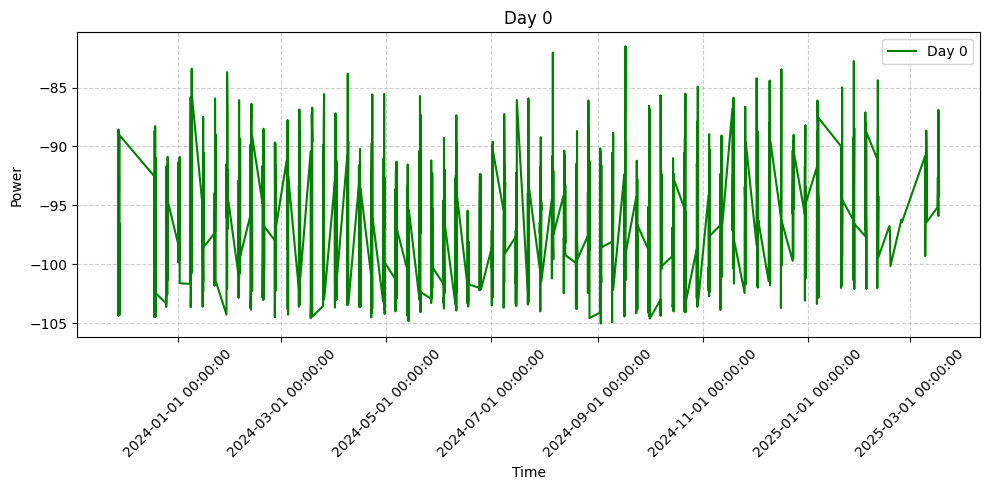

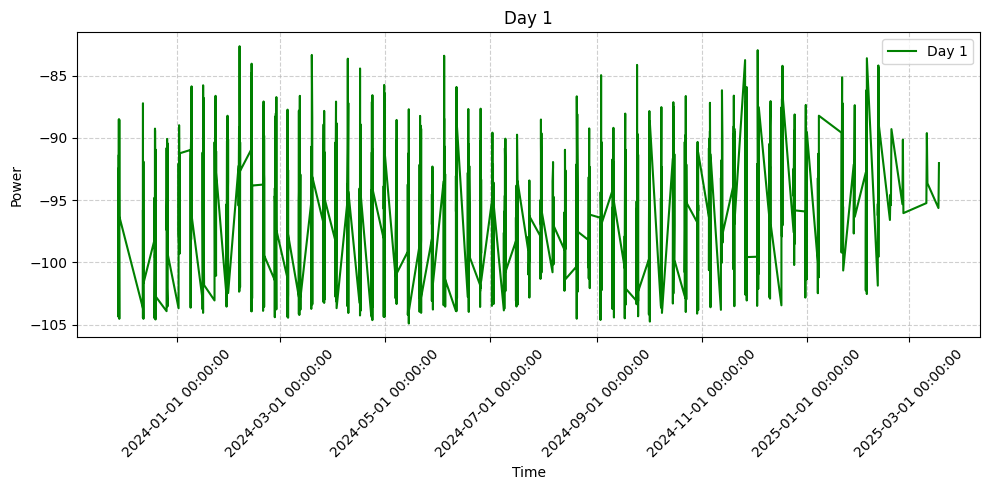

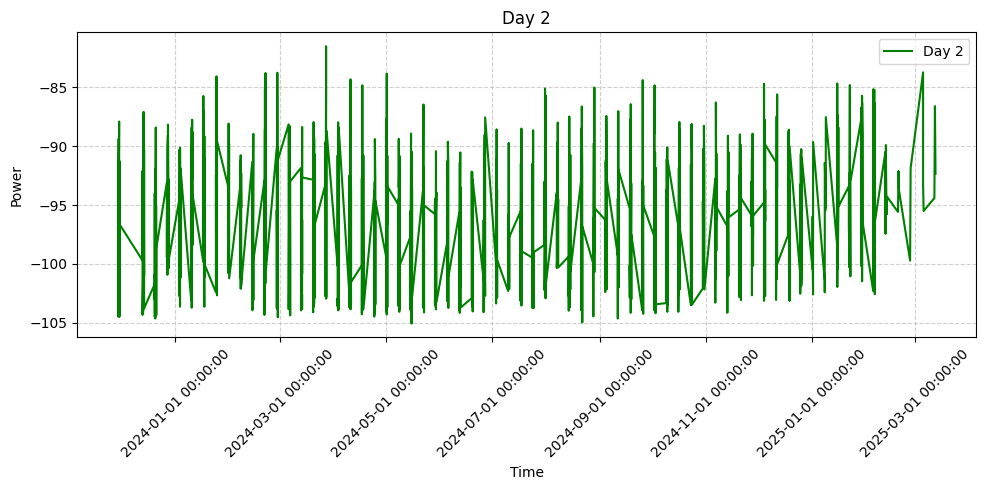

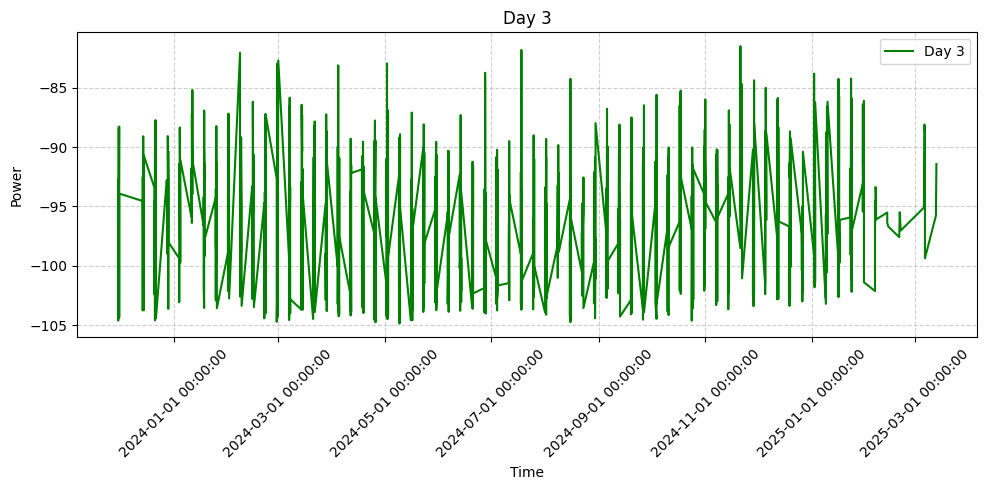

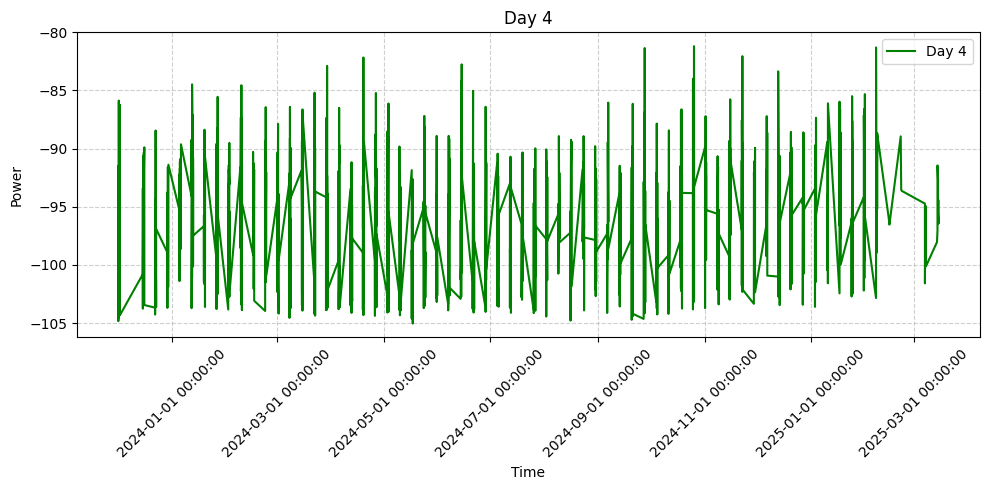

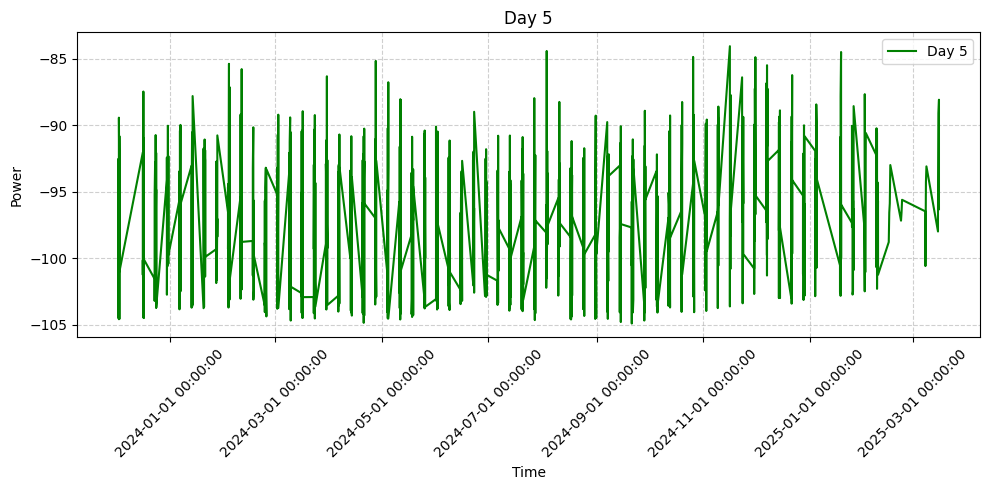

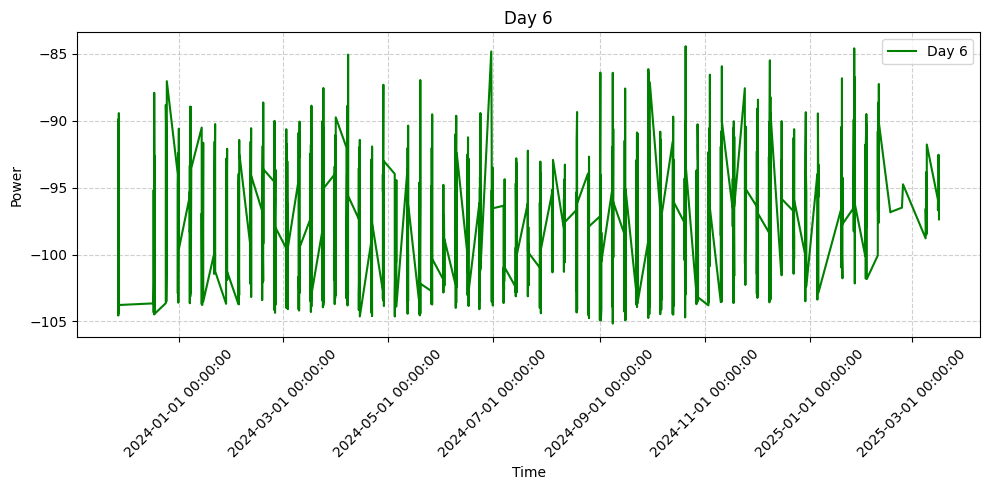

In [7]:
for day in range(7):
    df = main_df[main_df["Day"] == day]
    df = df.sort_values(by="Date")
    df = df[(np.abs(zscore(df['power'])) < 3)]
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(df["Date"], df["power"], label=f"Day {day}", color="g")
    ax.xaxis.set_major_locator(mdates.AutoDateLocator()) 
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S')) 
    plt.xticks(rotation=45) 
    plt.title(f"Day {day}")   
    plt.xlabel("Time")
    plt.ylabel("Power")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # df_main = main_df.drop(["Date"], axis=1)
# corr_matrix = main_df.corr()
# sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
# plt.show()